# Probabilidad de Exito

## Importar librerias

In [4]:
#Cargar todas las librerías
import pandas as pd
from matplotlib import  pyplot as plt 
from math import factorial
from scipy import stats as st
import math as math
import numpy as np
import seaborn as sns

## Cargar datos


In [5]:
df_gamer = pd.read_csv('./datasets/games.csv')

In [6]:
df_gamer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Limpiar datos.

### Cambiar Nombre a Columnas

In [7]:
df_gamer.columns = map(str.lower, df_gamer.columns)
df_gamer.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:

df_gamer.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Deteccion de valores nulos y duplicados

In [9]:
print(df_gamer.isna().sum())
print()
print(df_gamer.duplicated().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

0


### Cambiar valor de la columna year_of_release de float a entero y tratamiento de valores nulos.

In [10]:
df_gamer['year_of_release'].fillna(0, inplace = True)
df_gamer.year_of_release = df_gamer.year_of_release.astype(int)


C:\Users\ILMAS\AppData\Local\Temp\ipykernel_22988\2466378842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gamer['year_of_release'].fillna(0, inplace = True)


### cambio de valores de la columna user_score y tratamiento de valores nulos

In [11]:
df_gamer.loc[df_gamer['user_score']=='tbd','user_score']= np.nan
df_gamer.user_score = df_gamer.user_score.astype(float)

In [12]:
df_gamer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### tratamiento de valores nulos en critic_score

In [13]:
df_gamer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [14]:
df_gamer_critic_media = df_gamer['critic_score'].mean() 

In [15]:
df_gamer['critic_score'].fillna(df_gamer_critic_media, inplace = True)

C:\Users\ILMAS\AppData\Local\Temp\ipykernel_22988\2642325133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gamer['critic_score'].fillna(df_gamer_critic_media, inplace = True)


In [16]:
df_gamer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### Ventas totales

In [17]:
df_gamer['ventas_totales'] = df_gamer[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [18]:
df_gamer.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,NaN,NaN,31.38


## Analisis de datos

### Conteo por año de lanzamiento

In [19]:
anio_de_lanzamiento =df_gamer.groupby('year_of_release')['name'].count().sort_values(ascending = False).reset_index()

In [20]:
anio_de_lanzamiento = anio_de_lanzamiento[anio_de_lanzamiento['year_of_release'] != 0]

In [21]:
anio_de_lanzamiento

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


### Ventas por plataforma


In [22]:
ventas_por_plataforma = df_gamer.groupby( 'platform')['ventas_totales'].sum().sort_values(ascending = False).reset_index()

In [23]:
ventas_por_plataforma

,platform,ventas_totales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [24]:
depure_data = df_gamer.query('year_of_release >= 2013')

In [25]:
durabilidad = pd.pivot_table(depure_data, index = 'year_of_release', columns = 'platform', values = 'ventas_totales', aggfunc = 'sum').fillna(0)

In [26]:
durabilidad

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


<function matplotlib.pyplot.show(close=None, block=None)>

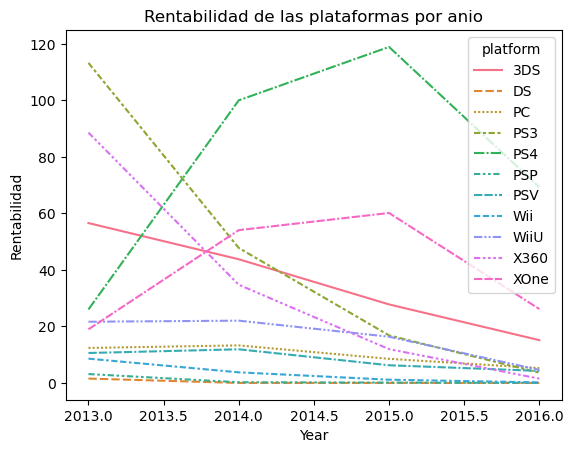

In [27]:
sns.lineplot(data = durabilidad)
plt.title('Rentabilidad de las plataformas por anio')
plt.ylabel('Rentabilidad')
plt.xlabel('Year')
plt.show

###### La plataforma mayoritariamente rentable deacuedo al analisis anterior es ps2 con 1255.77 en ventas totales; seguidad de  X360, PS3, Wii y DS que cuentan con menos de 1000 millones en ventas totales. por otro lado podemos ver que la ps4 dio mas rentabilidad en sulapso de vida teniendo como sus mejores años el 2014 y 2015.

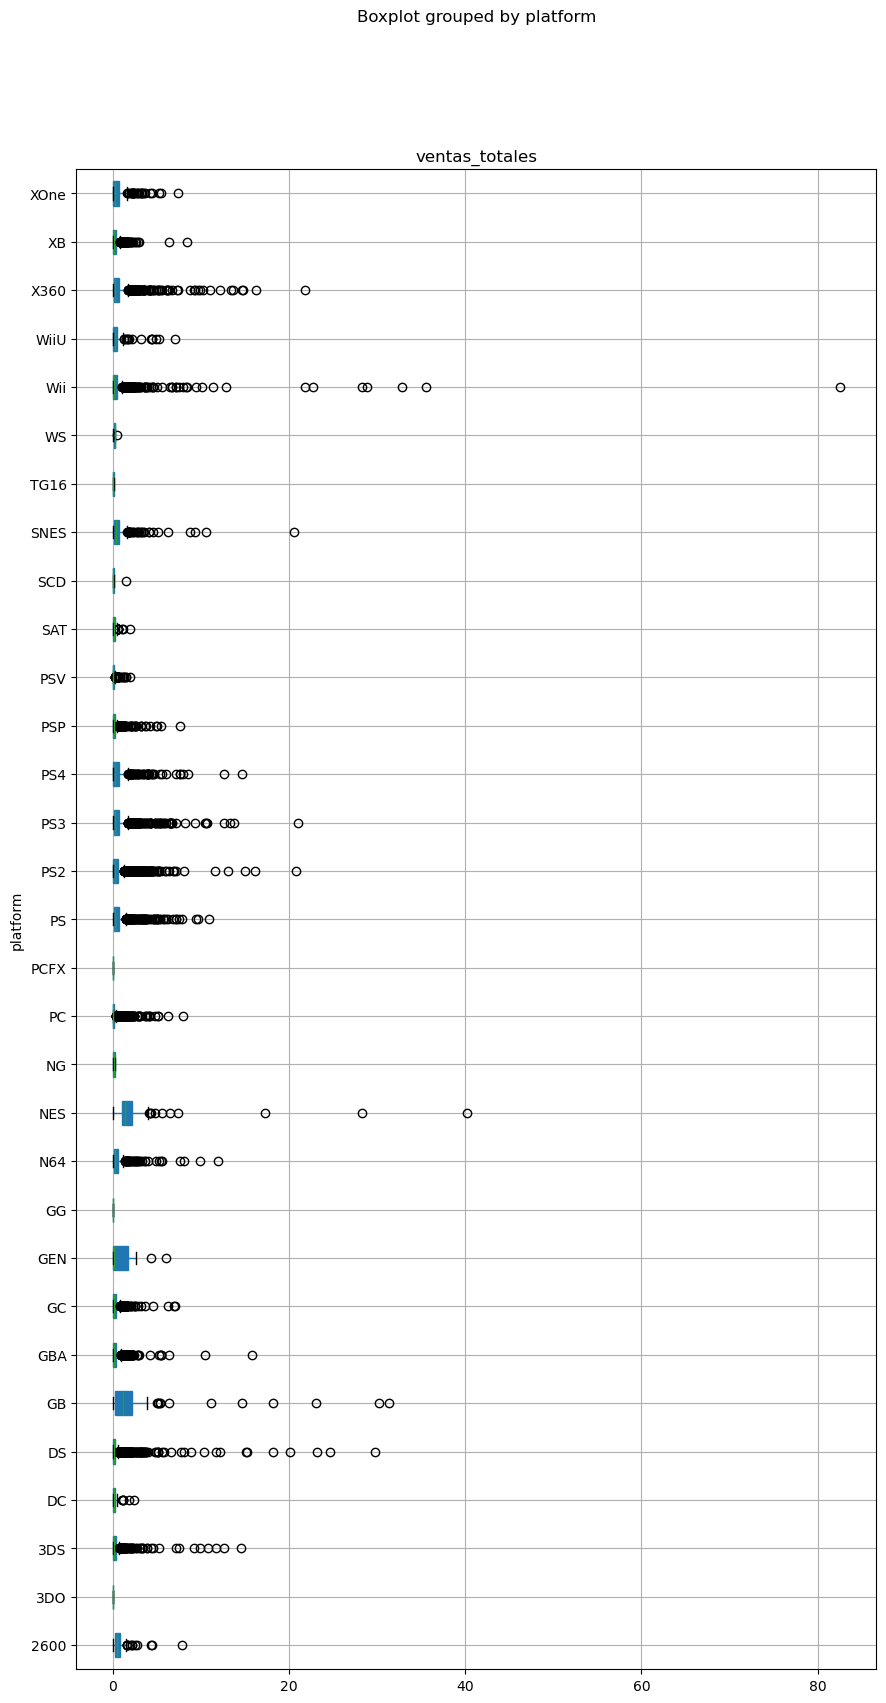

In [28]:
df_gamer.boxplot(column ='ventas_totales', by = 'platform', vert = False, patch_artist = True, figsize= (10,20) )
plt.show()

### Ventas en relacion con la puntuacion del usuario

<function matplotlib.pyplot.show(close=None, block=None)>

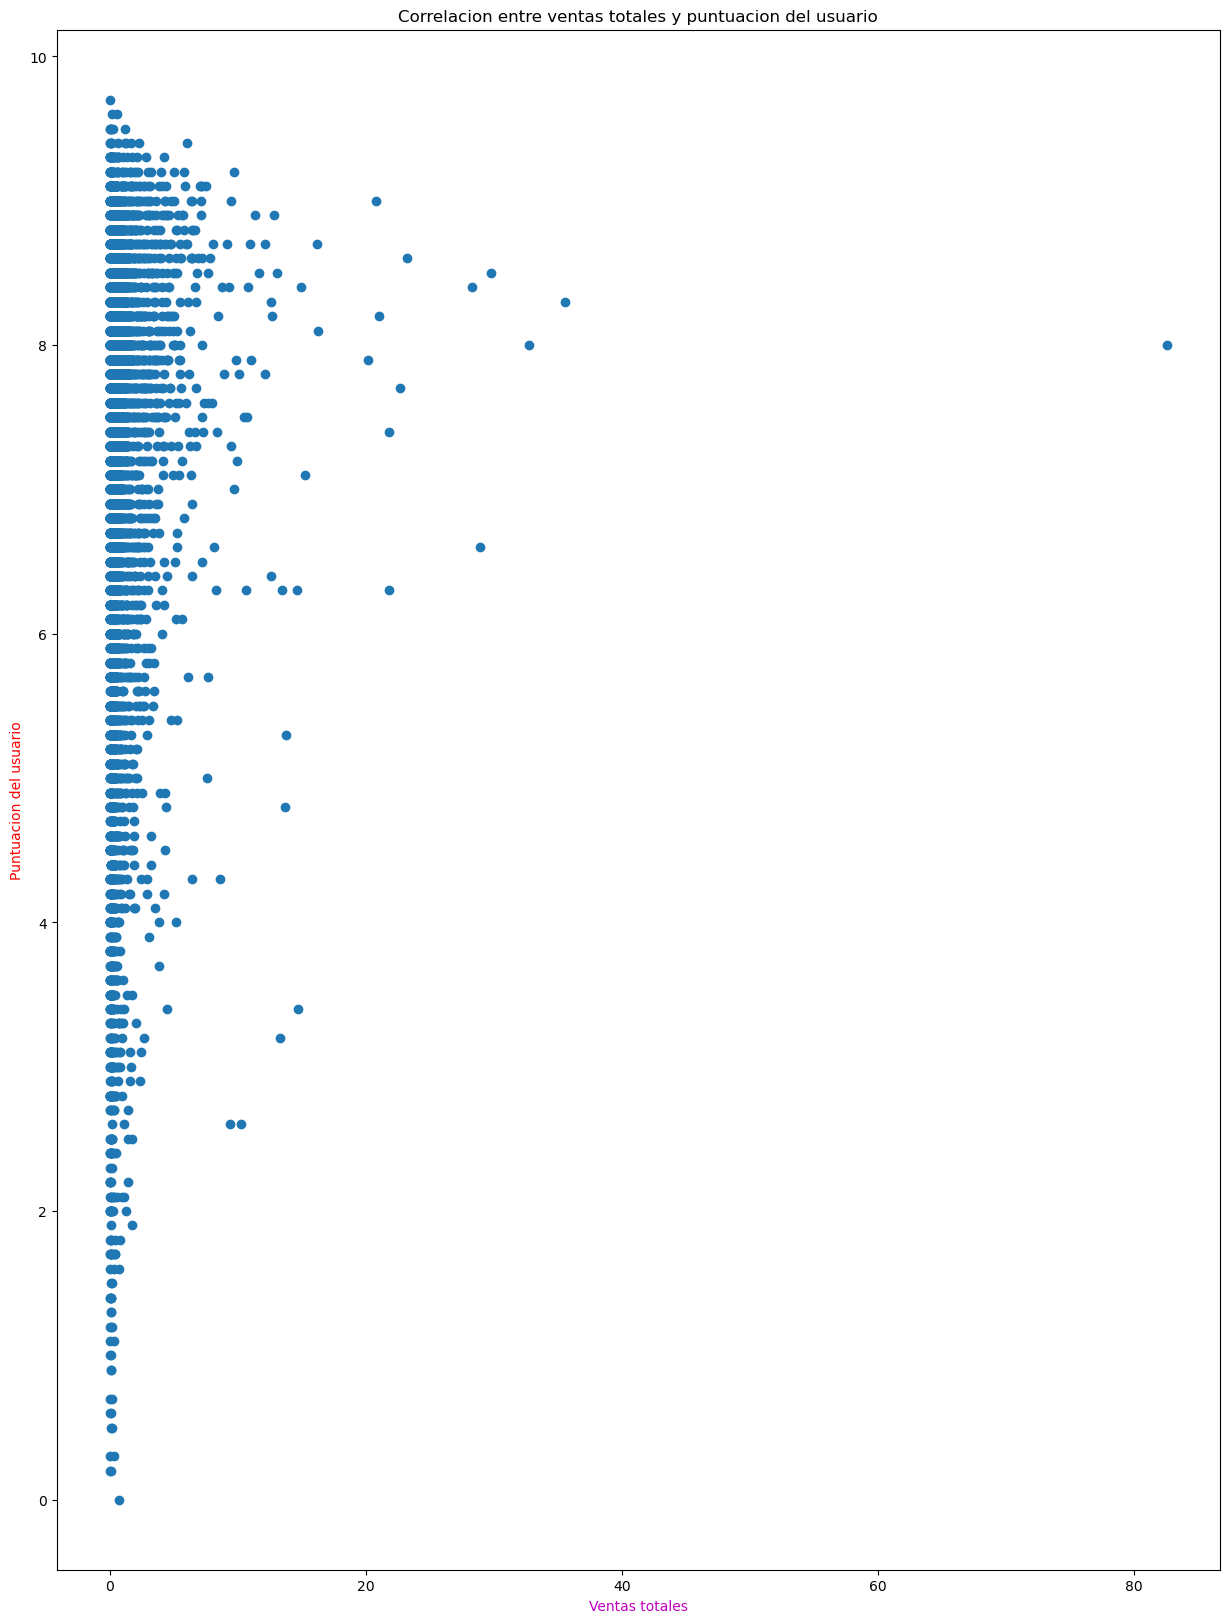

In [29]:
plt.figure(figsize= (15,20))
plt.scatter(data = df_gamer, x='ventas_totales', y='user_score',)
plt.title('Correlacion entre ventas totales y puntuacion del usuario')
plt.xlabel('Ventas totales', color = 'm')
plt.ylabel('Puntuacion del usuario', color = 'r')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

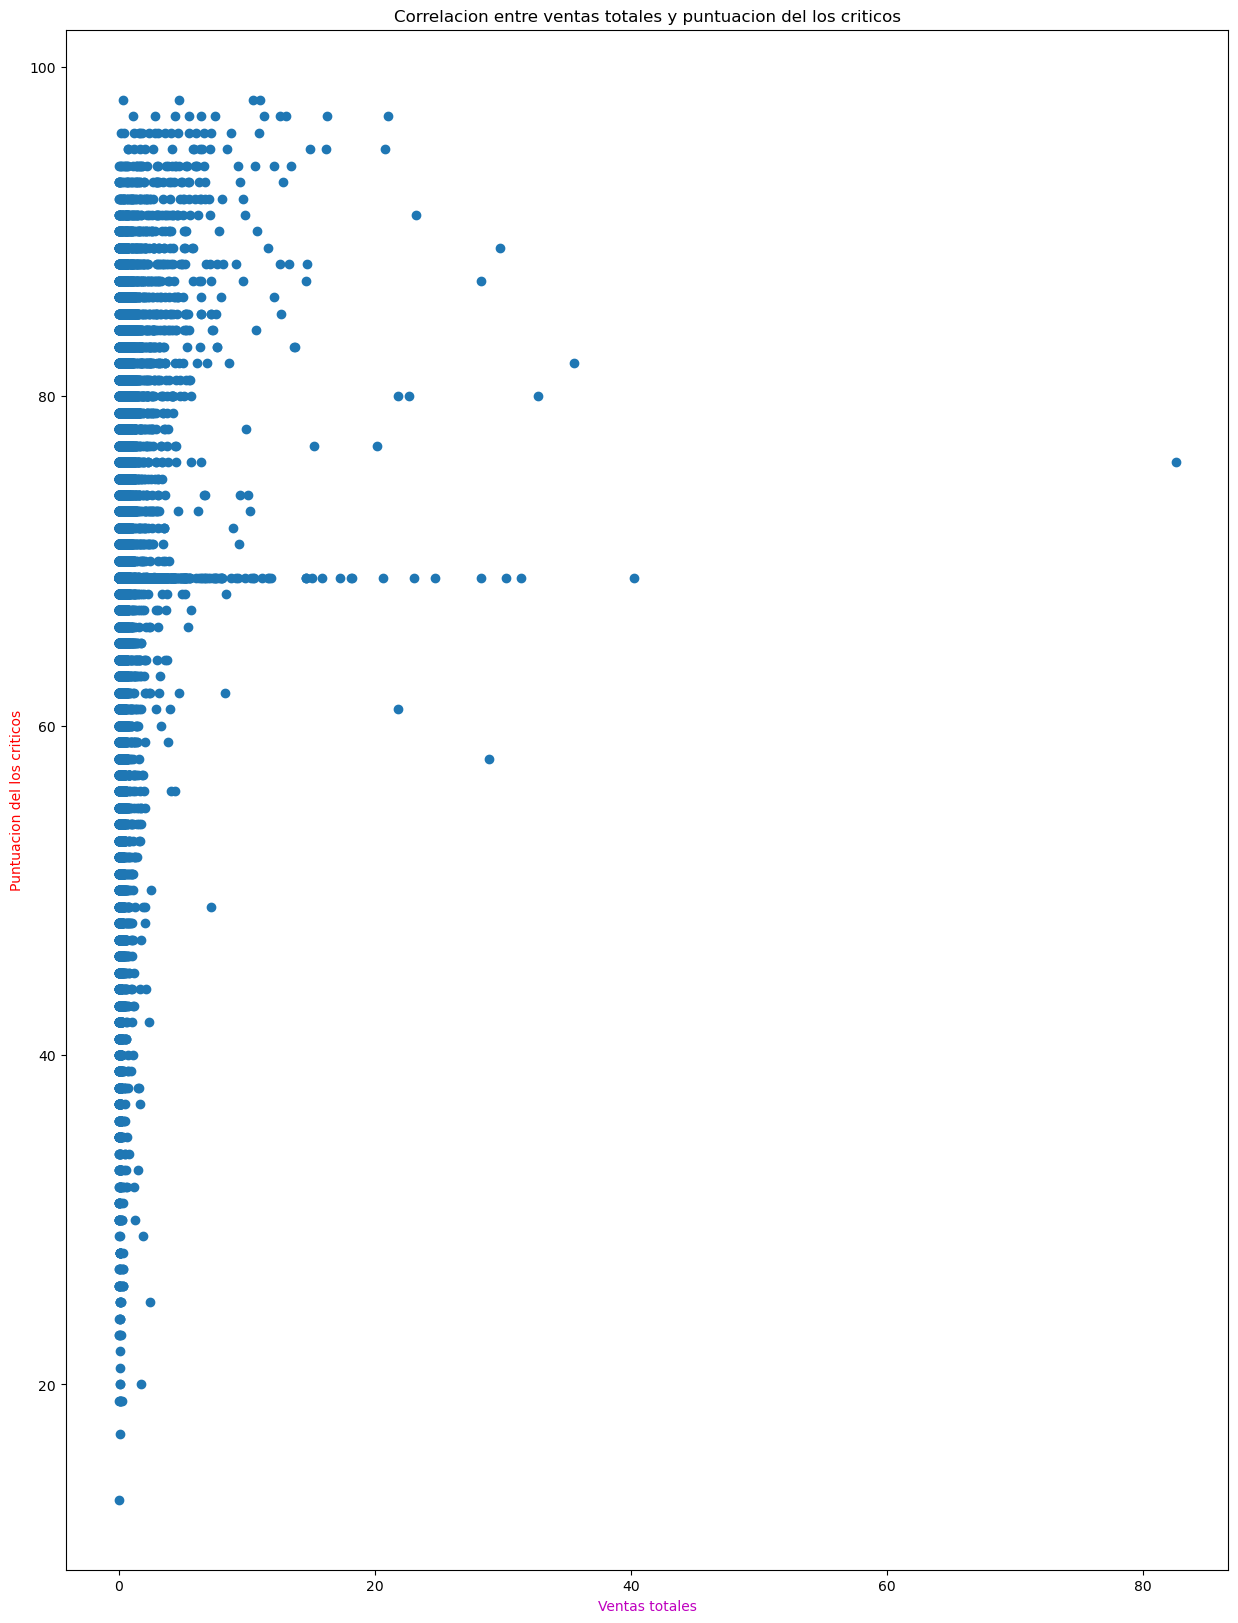

In [30]:
plt.figure(figsize= (15,20))
plt.scatter(data = df_gamer, x='ventas_totales', y='critic_score',)
plt.title('Correlacion entre ventas totales y puntuacion del los criticos')
plt.xlabel('Ventas totales', color = 'm' )
plt.ylabel('Puntuacion del los criticos', color = 'r')
plt.show

### Distribucion de ventas por genero

In [31]:
ventas_por_genero = df_gamer.groupby('genre')['ventas_totales'].sum().sort_values(ascending = False).reset_index()

In [32]:
ventas_por_genero

,genre,ventas_totales
0,Action,1744.17
1,Sports,1331.27
2,Shooter,1052.45
3,Role-Playing,934.56
4,Platform,827.77
5,Misc,802.51
6,Racing,728.67
7,Fighting,447.53
8,Simulation,389.97
9,Puzzle,242.57


###### Contamos con 3 generos que superan los 1000 millones, los cuales son: action, sports, shooter y a consideracion mia el menos rentable seria strategy con 174.23 millones. 

## Creacion de perfil de usuario por region

### Plataformas principales

In [33]:
ventas_na_sale_plataforma = df_gamer.groupby('platform')['na_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_na_sale_plataforma.head())
print()
ventas_eu_sale_plataforma = df_gamer.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_eu_sale_plataforma.head())
print()
ventas_jp_sale_plataforma = df_gamer.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_jp_sale_plataforma.head()) 
print()
ventas_other_sale_plataforma = df_gamer.groupby('platform')['other_sales'].sum().sort_values(ascending = False).reset_index()
ventas_other_sale_plataforma.head() 

  platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40

  platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61

  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67



,platform,other_sales
0,PS2,193.44
1,PS3,135.68
2,X360,85.76
3,Wii,79.07
4,DS,59.26


### Generos principales

In [34]:
ventas_na_sale_genero = df_gamer.groupby('genre')['na_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_na_sale_genero.head())
print()
ventas_eu_sale_genero = df_gamer.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_eu_sale_genero.head())
print()
ventas_jp_sale_genero = df_gamer.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_jp_sale_genero.head()) 
print()
ventas_other_sale_genero = df_gamer.groupby('genre')['other_sales'].sum().sort_values(ascending = False).reset_index()
ventas_other_sale_genero.head() 

      genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27

     genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74

          genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11



,genre,other_sales
0,Action,184.60
1,Sports,134.51
2,Shooter,104.11
3,Racing,76.10
4,Misc,74.39


### Rating y su afectacion

In [35]:
ventas_na_sale_Rating = df_gamer.groupby('rating')['na_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_na_sale_Rating)
print()
ventas_eu_sale_Rating = df_gamer.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_eu_sale_Rating)
print()
ventas_jp_sale_Rating = df_gamer.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).reset_index()
print(ventas_jp_sale_Rating) 
print()
ventas_other_sale_Rating = df_gamer.groupby('rating')['other_sales'].sum().sort_values(ascending = False).reset_index()
ventas_other_sale_Rating 

  rating  na_sales
0      E   1292.99
1      T    759.75
2      M    748.48
3   E10+    353.32
4    K-A      2.56
5     EC      1.53
6     AO      1.26
7     RP      0.00

  rating  eu_sales
0      E    710.25
1      M    483.97
2      T    427.03
3   E10+    188.52
4     AO      0.61
5    K-A      0.27
6     EC      0.11
7     RP      0.08

  rating  jp_sales
0      E    198.11
1      T    151.40
2      M     64.24
3   E10+     40.20
4    K-A      1.46
5     AO      0.00
6     EC      0.00
7     RP      0.00



,rating,other_sales
0,E,234.17
1,M,177.10
2,T,155.17
3,E10+,73.56
4,EC,0.11
5,AO,0.09
6,K-A,0.03
7,RP,0.01


## pruevas de hipotesis

### Calificasiones promedio por plataforma

In [36]:
promedio_por_plataforma = df_gamer.groupby('platform')['user_score'].mean().sort_values(ascending = False).reset_index()
print(promedio_por_plataforma)


   platform  user_score
0        DC    8.528571
1        PS    7.865432
2       GBA    7.676863
3       PS2    7.626833
4        GC    7.597541
5        XB    7.500512
6       PSV    7.336364
7       PSP    7.228266
8        PC    7.062468
9        DS    7.025194
10     WiiU    6.904000
11      3DS    6.831609
12      PS4    6.748249
13      Wii    6.742679
14      PS3    6.726568
15     X360    6.683540
16     XOne    6.521429
17     2600         NaN
18      3DO         NaN
19       GB         NaN
20      GEN         NaN
21       GG         NaN
22      N64         NaN
23      NES         NaN
24       NG         NaN
25     PCFX         NaN
26      SAT         NaN
27      SCD         NaN
28     SNES         NaN
29     TG16         NaN
30       WS         NaN


###### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [37]:
variable_1 = df_gamer.query('platform == "XOne"')['user_score']
print(variable_1) 
variable_2 = df_gamer.query('platform == "PC"')['user_score']
print(variable_2) 

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: user_score, Length: 247, dtype: float64
85       7.6
138      7.3
192      4.0
195      NaN
218      8.2
        ... 
16690    NaN
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 974, dtype: float64


In [38]:
alpha = 0.05

results = st.ttest_ind(variable_1, variable_2, equal_var=False, nan_policy = 'omit')
print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 4.935072360183574e-06
Rechazamos la hipótesis nula


###### podemos ver que las diferentes plataformas tienen un promedio muy peculiar, pero ninguno es igual entre si. Deacuerdo a las calificasiones de los usuarios, la mejor plataforma es DC sin embargo se cuenta con muchas mas de nivel popular semejante.

### Calificasiones promedio por genero

In [39]:
promedio_por_genero = df_gamer.groupby('genre')['user_score'].mean().sort_values(ascending = False).reset_index()
print(promedio_por_genero)


           genre  user_score
0   Role-Playing    7.619515
1       Fighting    7.302506
2       Platform    7.301402
3       Strategy    7.295177
4         Puzzle    7.175000
5     Simulation    7.134593
6      Adventure    7.133000
7         Action    7.054044
8        Shooter    7.041883
9         Racing    7.036193
10        Sports    6.961197
11          Misc    6.819362


###### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [40]:
variables_1 = df_gamer.query('genre == "Action"')['user_score'] 
print(variables_1) 
variables_2 =df_gamer.query('genre == "Sports"')['user_score']
print(variables_2) 

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16692    7.6
16694    NaN
16695    NaN
16699    NaN
16710    NaN
Name: user_score, Length: 3369, dtype: float64
0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16676    NaN
16688    NaN
16693    NaN
16700    NaN
16711    NaN
Name: user_score, Length: 2348, dtype: float64


In [41]:
alpha = 0.05 

results = st.ttest_ind( 
    variables_1,  
    variables_2, equal_var=False, nan_policy = 'omit') 
print('valor p: ', results.pvalue) 

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula") 
else:
    print("No podemos rechazar la hipótesis nula") 

valor p:  0.11483818791498288
No podemos rechazar la hipótesis nula


###### Ningun genero tiene relevancia significativa de acuerdo con su calificasion, no cuentan con gran diferncia entre si. 

## conclusion


###### Podemos encontrar que dependiendo la region, las preferencias en cuestion de plataforma son muy variadas, a diferencia del genero ya que el de accion  es el que cuenta con mas ventas en cada una de las regiones por ello se tendria que poner mayor enfacis en generar mayor impacto en los demas.